# LAB 06 - 서브플롯

- 하나의 그래픽 영역을나우어 두 개 이상의 시각화 결과물을 하나의 화면에서 표현할 수 있다


### #01.준비 작업

#### 1-1 패키지 참조

In [5]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb
import numpy as np

#### 1-2 그래프 전역 설정

In [6]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 1-3 데이터 가져오기

In [8]:
origin = load_data('traffic_acc')
origin

[data] https://data.hossam.kr/data/lab04/traffic_acc.xlsx
[desc] 2005년 1월 부터 2018년 12월 까지 월별 교통사고의 발생건수,부상자수,사망자수 데이터(인덱스/메타데이터 없음, 출처: 공공데이터포털)
[!] Cannot read metadata


,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


#### 1-4 데이터 전처리
- 각 변수를 년도별 평균값으로 전처리 한다

In [9]:
df = origin.drop('월',axis =1).groupby('년도').mean()
df

,발생건수,사망자수,부상자수
년도,,,
2005,17847.583333,531.333333,28519.416667
2006,17812.083333,527.250000,28352.416667
2007,17638.500000,513.833333,27992.166667
2008,17985.166667,489.166667,28246.833333
2009,19332.500000,486.500000,30156.250000
2010,18906.500000,458.750000,29371.500000
2011,18475.916667,435.750000,28449.250000
2012,18638.000000,449.333333,28713.750000
2013,17946.166667,424.333333,27392.583333


### #02.서브플롯의 기본 사용
- 2행 3열을 갖는 서브플롯 영역을 구성한다

- pyplot.subplots(행, 열 [, figsize=(가로크기, 세로크기)])
- plt.subplots() 메서드에 의해 리턴되는 fig 는 그래픽 처리 기능을 제공하는 객체이다
- plt.subplots() 메서드에 의해 리턴되는 ax 객체는 분할된 각 그래츠 영역의 객체를 저장하고 있는 리스트이다

#### 2-1 서브플롯 영역 나누기


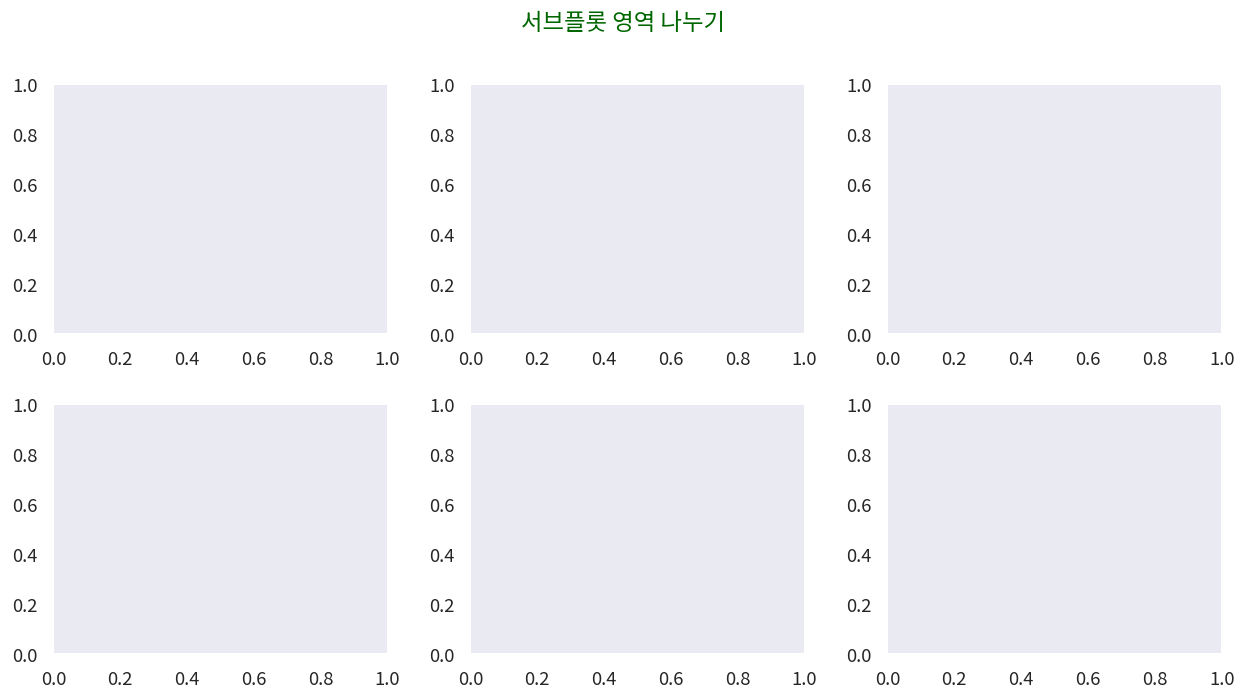

In [11]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 3                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용


# 3) 그래프 꾸미기

#그래프 전체에 대한 제목
fig.suptitle('서브플롯 영역 나누기',fontsize = 14 , color ='#006600')

#각 그래프 간의 가로 (wspace) , 세로 (hspace) 간격 지정
fig.subplots_adjust(wspace=0.2 , hspace=0.2)



# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### 2-2 서브플롯에 그래프 그리기

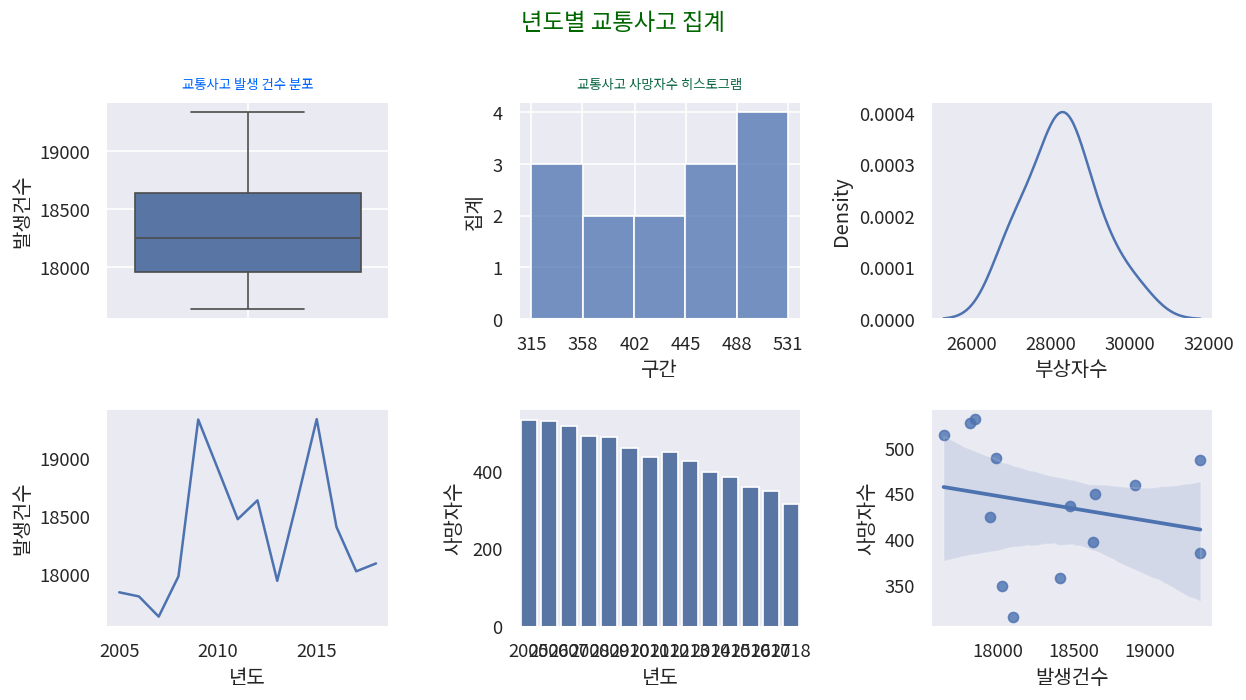

In [18]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 3                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df, y='발생건수',ax=ax[0][0])
sb.histplot(data=df, x='사망자수',bins=5,ax=ax[0][1])
sb.kdeplot(data=df, x='부상자수',ax=ax[0][2])
sb.lineplot(data=df, x=df.index, y='발생건수',ax=ax[1][0])
sb.barplot(data=df, x=df.index, y='사망자수',estimator=np.mean,ax=ax[1][1])
sb.regplot(data=df,x='발생건수', y='사망자수',ax=ax[1][2])


# 3) 그래프 꾸미기



#그래프 전체에 대한 제목
fig.suptitle('년도별 교통사고 집계',fontsize = 14 , color ='#006600')

#각 그래프 간의 가로 (wspace) , 세로 (hspace) 간격 지정
fig.subplots_adjust(wspace=0.2 , hspace=0.2)



# 첫 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[0][0].set_title("교통사고 발생 건수 분포", color="#0066ff", fontsize=8, pad=8)
ax[0][0].grid()

# 두 번째 영역 그래프의 축 설정 및 x, y축 라벨 지정, 격자
hist, bins = np.histogram(df['사망자수'], bins=5)
bins = bins.round().astype("int")
ax[0][1].set_title("교통사고 사망자수 히스토그램", color="#0f6a46", fontsize=8, pad=8)
ax[0][1].set_xticks(bins, bins)
ax[0][1].set_xlabel('구간')
ax[0][1].set_ylabel('집계')
ax[0][1].grid()



# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### #03 두 개의 y 축을 갖는 그래프

#### 3-1 샘플 데이터 만들기

In [19]:
# x 축 데이터 (공용)
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
# 첫 번쨰 y 축 데이터
y1 = np.arange(10)
y1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
# 두번째 y 축 데이터
y2 = x**2
y2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

#### 3-2 서브 플롯으로 2개의 y 축을 갖는 그래프 구현

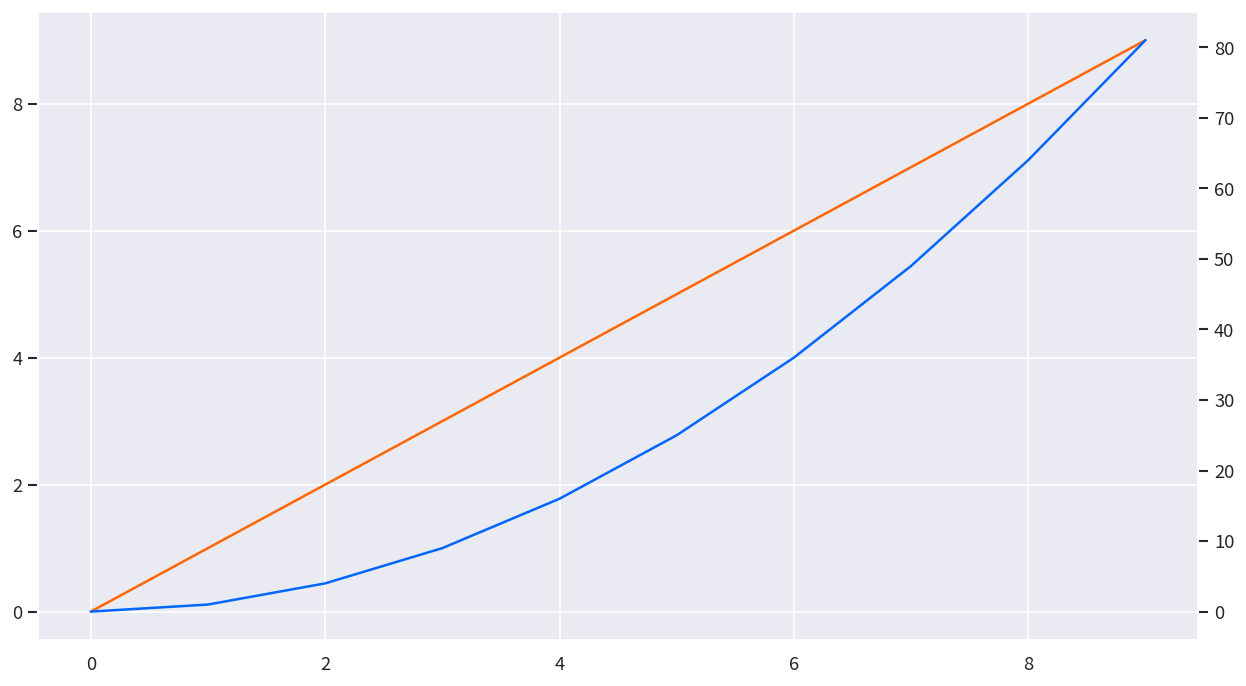

In [23]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax1 = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

#ax1 에 겹쳐지는 쌍둥이 서브 플롯을 생성
ax2 = ax1.twinx()


# 2) Line plot 그리기 
sb.lineplot(x=x,y=y1,color='#ff6600',ax=ax1)
sb.lineplot(x=x,y=y2,color='#0066ff',ax=ax2)


# 3) 그래프 꾸미기
ax1.grid(True)   #그래프가 겹쳐지기 떄문에 격자 옵션은 한번만 설정해도 무방



# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### #04 교통사고 발생건수와 사망자 수 변화 시각화 하기

- 우리나라는 2008년도에 자동차안전기준에 관한 규칙 일부개정령(안) 을 개정한 이후 꾸준히 교통사고안
전기준을 강화해 왔다. 이러한 노력이 교통사고 부상자수를 줄이는데 효과가 있었는지 알아보자

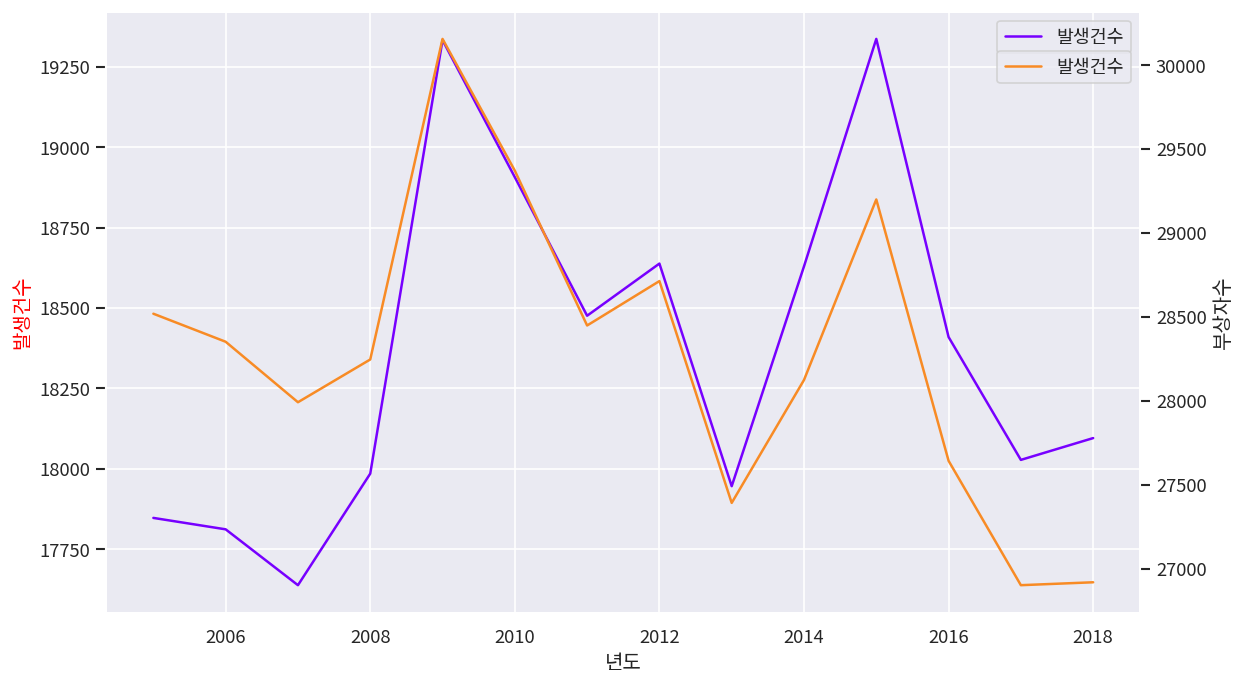

In [32]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax1 = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

#ax1 에 겹쳐지는 쌍둥이 서브 플롯을 생성
ax2 = ax1.twinx()


# 2) Line plot 그리기 
sb.lineplot(data=df , x=df.index,y='발생건수',color="#7700ff",ax=ax1,label='발생건수')
sb.lineplot(data=df , x=df.index,y='부상자수',color="#F88B25",ax=ax2,label='발생건수')


# 3) 그래프 꾸미기
ax1.grid(True)   #그래프가 겹쳐지기 떄문에 격자 옵션은 한번만 설정해도 무방
ax1.set_xlabel('년도')
ax1.set_ylabel('발생건수', color='#ff0000')
ax1.grid(True)           

# 그래프가 겹쳐지므로 격자는 하나만 표시해도 됨
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


<해석>
- 개정안이 시행되기 전(2008년)에는 교통사고 발생건수 대비 부상자 수의 비율이 더 많았지만 개정안이
- 시행된 후에는 교통사고 발생건수 대비 부상자수의 비율이 현저히 낮아졌다